# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, LSTM, GRU, Input

from tqdm import tqdm
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import chi2, RFE, SelectFromModel, SelectKBest


from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.svm import SVR, LinearSVC, NuSVC, LinearSVR, NuSVR
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestCentroid, RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier, \
     AdaBoostClassifier, RandomForestClassifier, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegressionCV, RidgeClassifier, ARDRegression, BayesianRidge, \
     ElasticNetCV, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC, OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV, \
     PassiveAggressiveRegressor, PoissonRegressor, RANSACRegressor, Ridge, RidgeCV, SGDRegressor, TheilSenRegressor, TweedieRegressor, LogisticRegression


# Load Data

In [2]:
# data1 = pd.read_csv('..\Dataset\diabetes_012_health_indicators_BRFSS2015.csv')
data1 = pd.read_csv('..\Dataset\diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# data1 = pd.read_csv('..\Dataset\diabetes_binary_health_indicators_BRFSS2015.csv')
data1

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


# Initial Analysis

In [ ]:
data1.describe().transpose()

In [3]:
numerical_columns = [column for column in data1.columns if data1[column].dtype != 'object']
print(numerical_columns)

non_biner_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
print(non_biner_columns)

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


In [4]:
def set_dtypes(data1):
    for column in numerical_columns:
        data1[column] = data1[column].astype('int8')
    return data1

data1 = set_dtypes(data1)

# Data Exploration

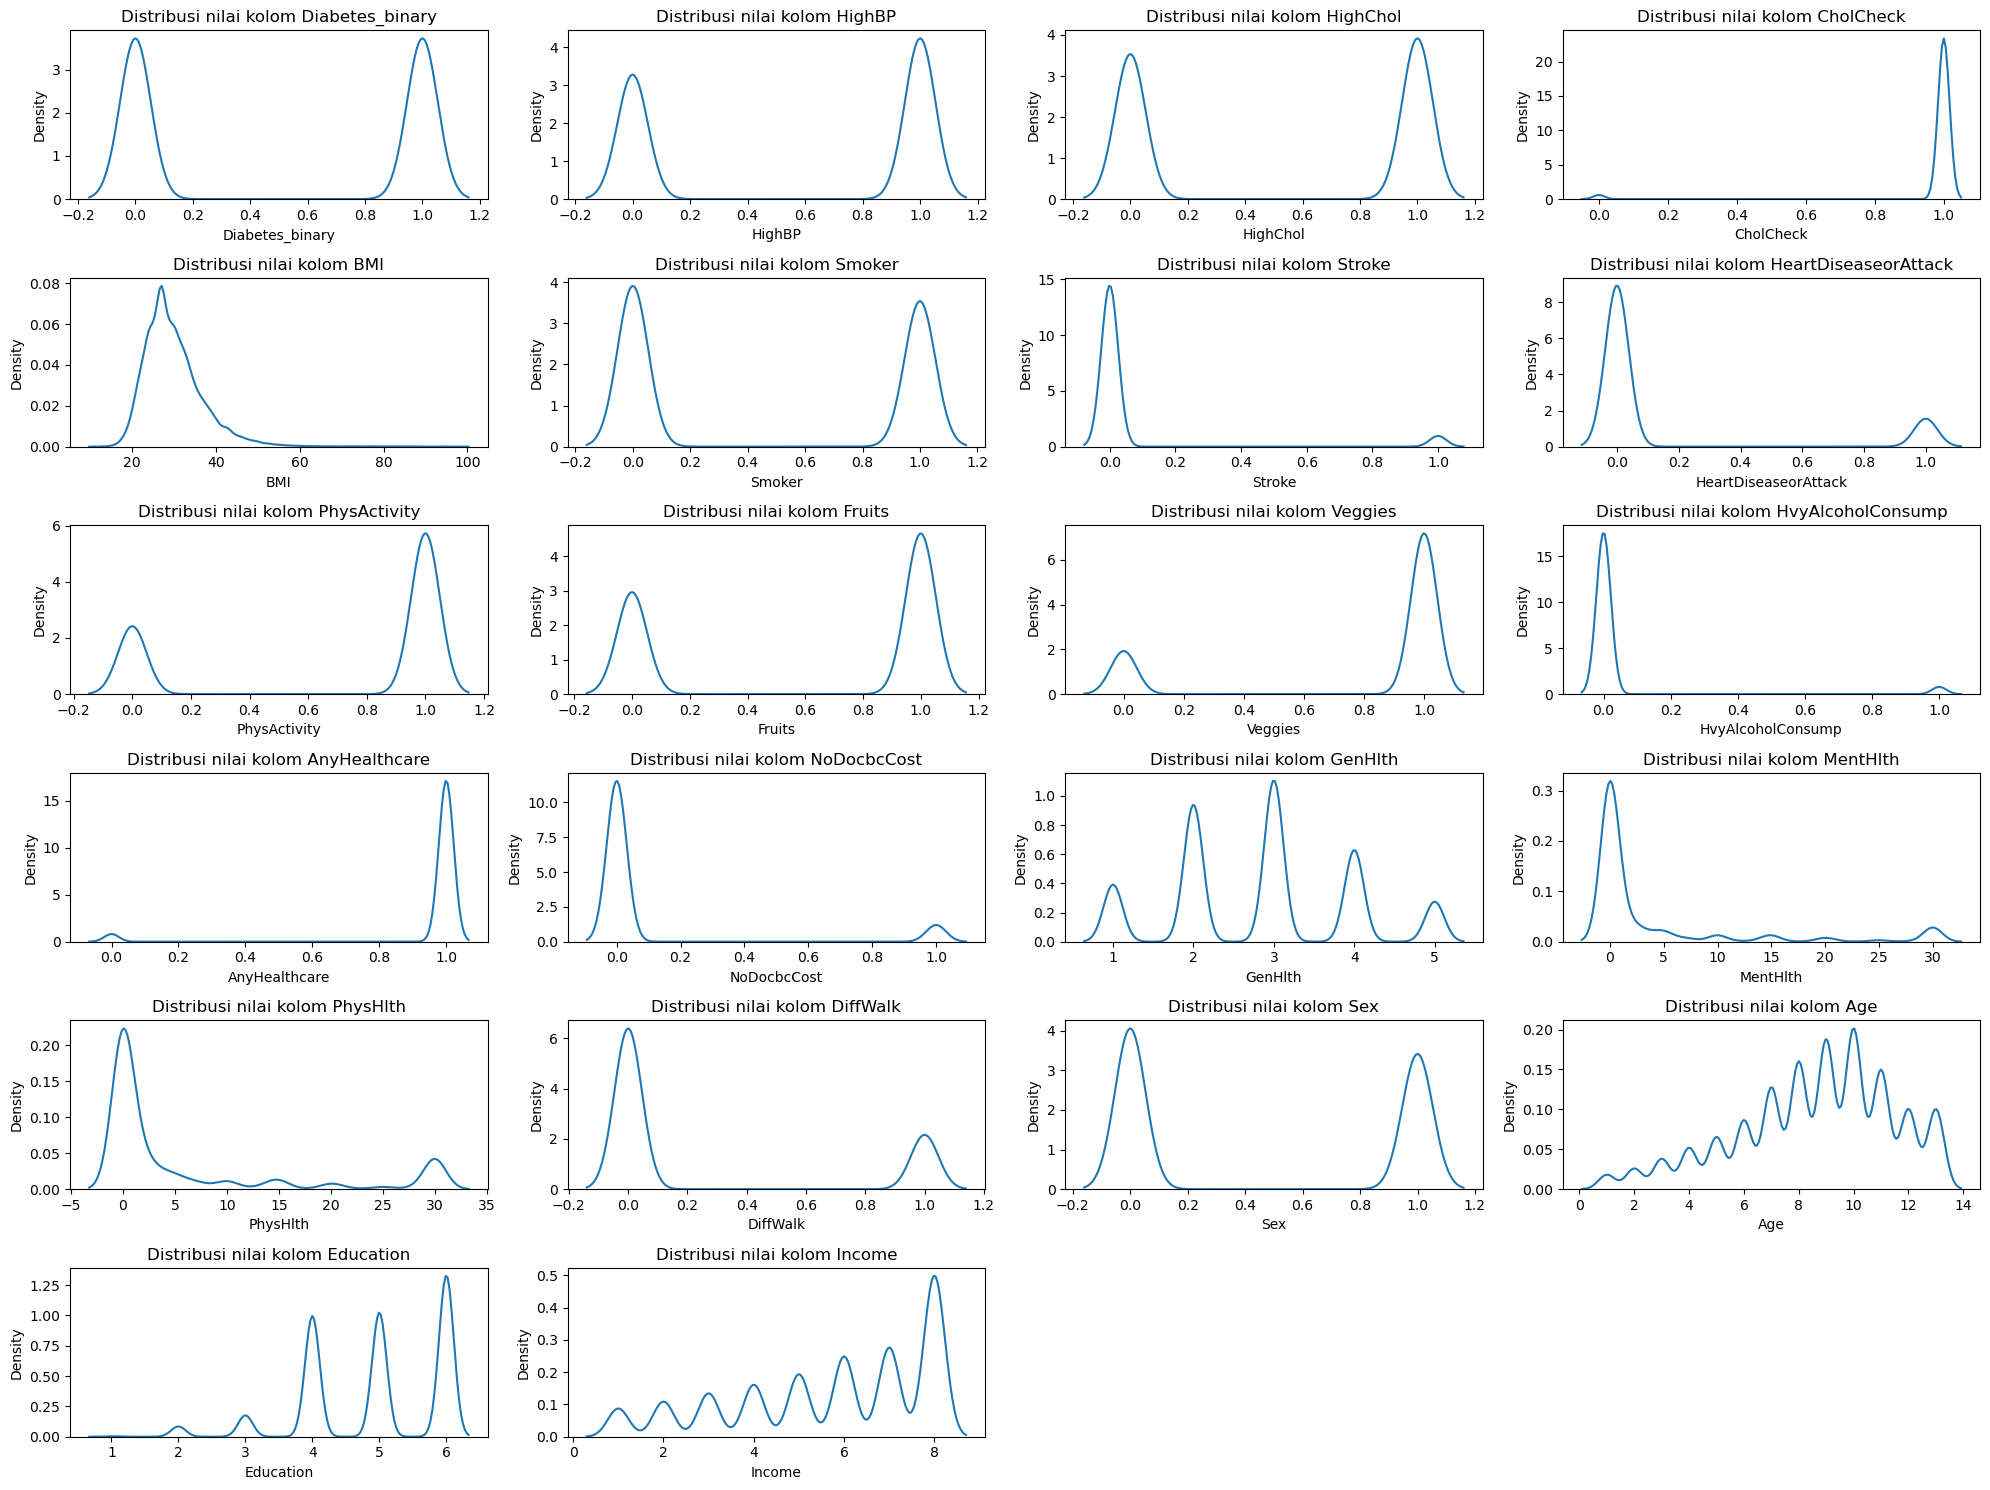

In [53]:
num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data=data1, x=column, ax=axes[row, col]).set_title("Distribusi nilai kolom " + column)
    

for i in range(len(numerical_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

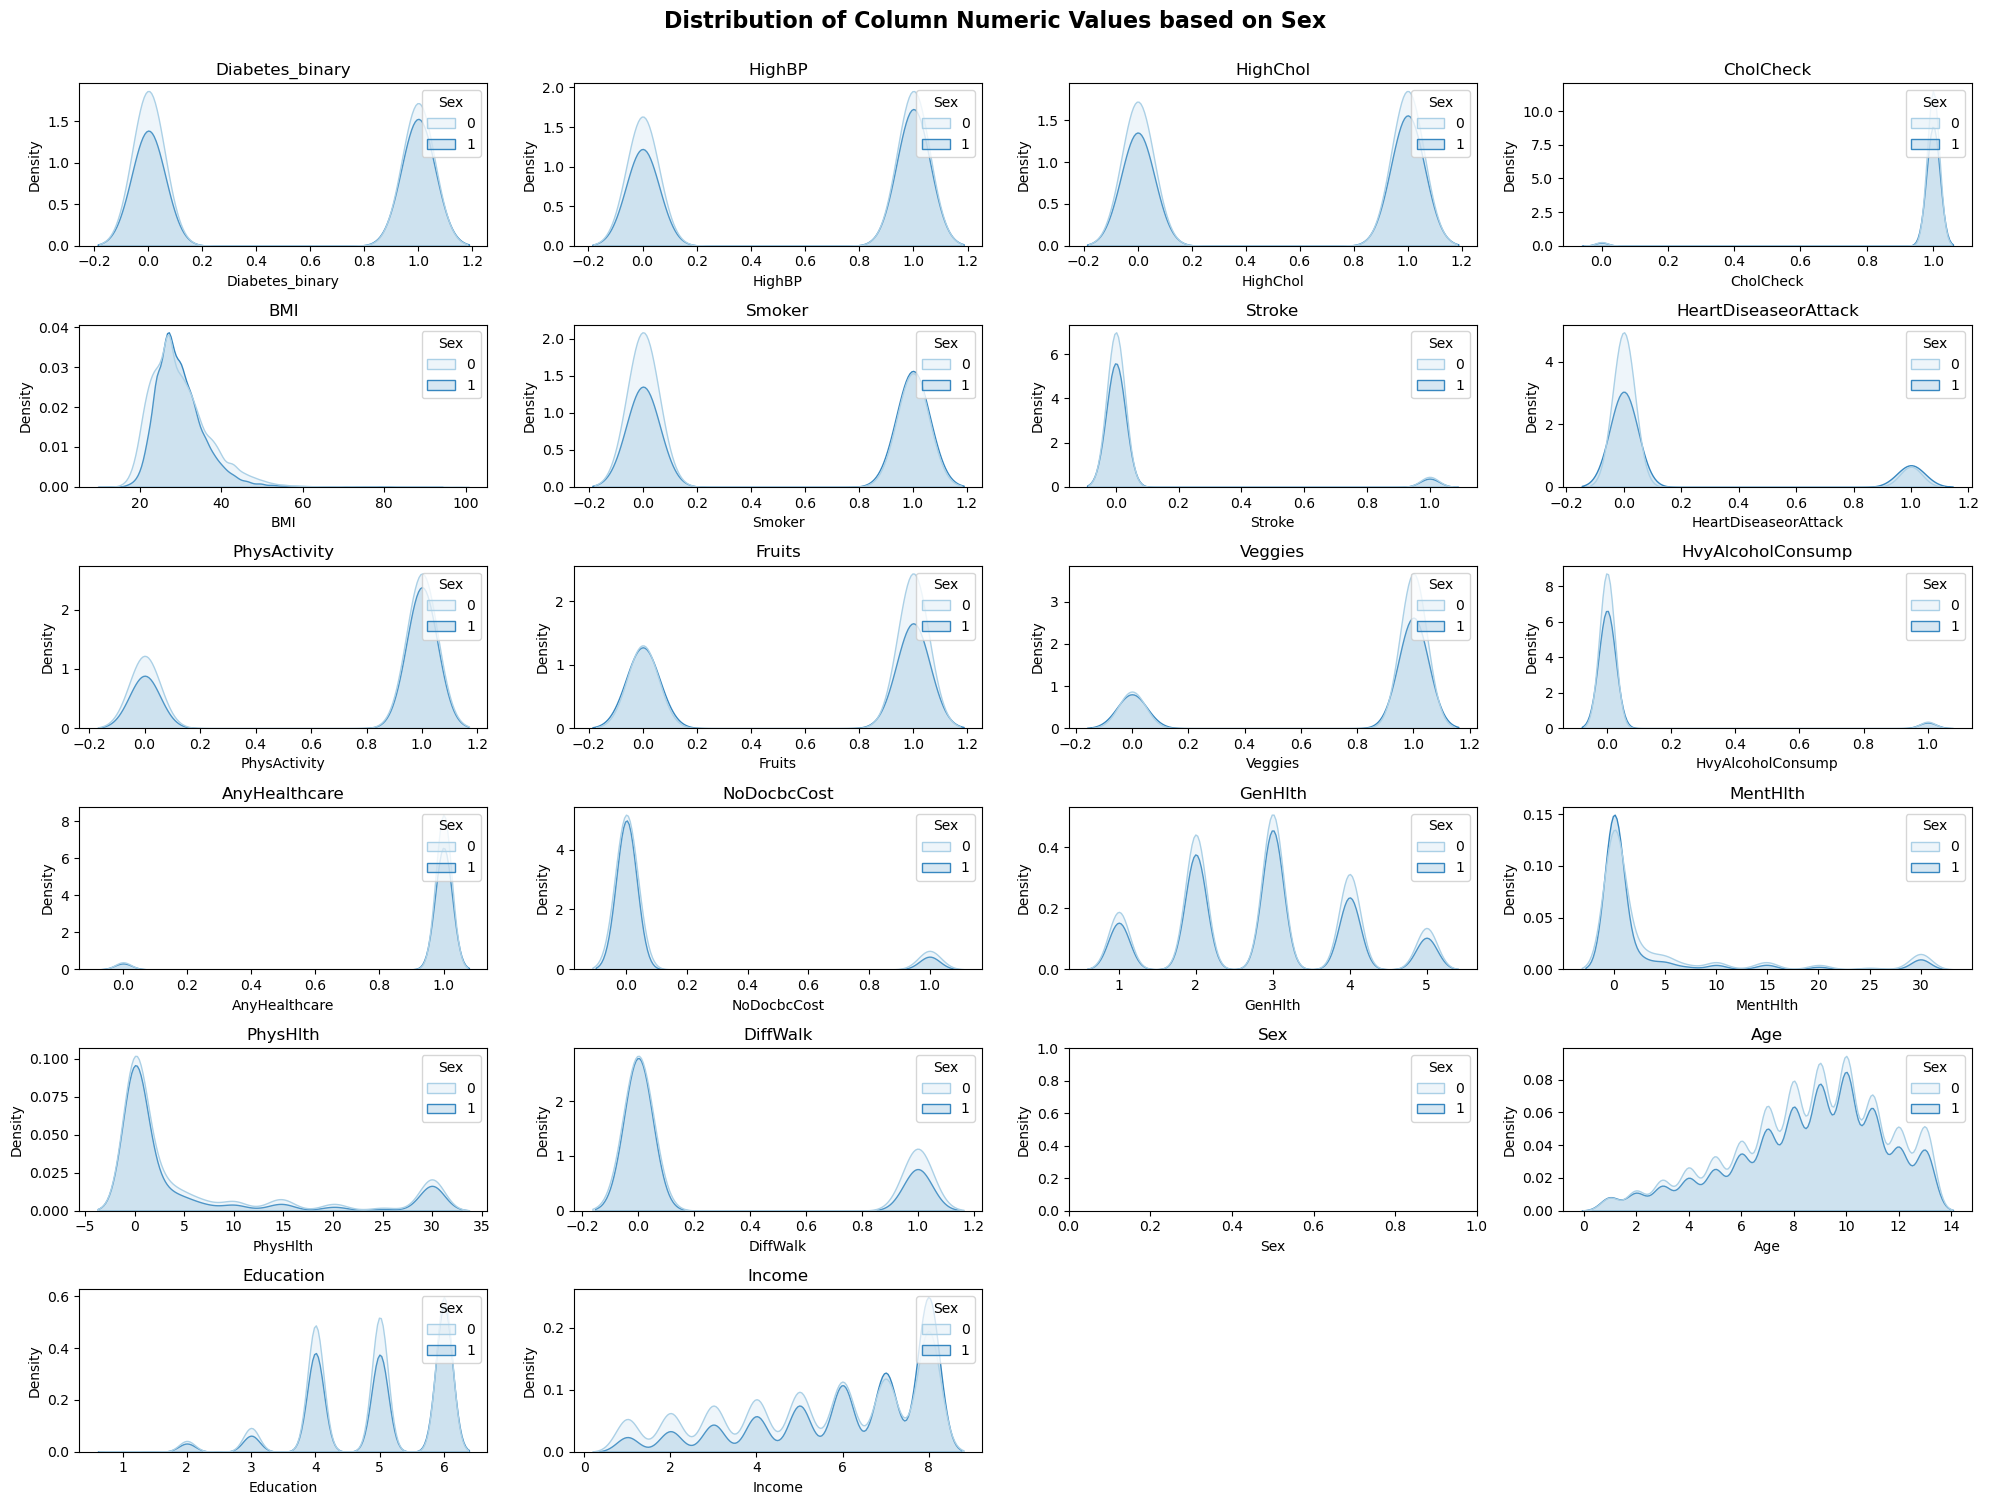

In [54]:
num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data=data1, x=column, hue="Sex", 
                fill=True, alpha=.2, palette="Blues", 
                ax=axes[row, col])\
                .set_title(column)

for i in range(len(numerical_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

fig.suptitle('Distribution of Column Numeric Values based on Sex', y=1.0, fontsize=16, fontweight='bold')


plt.tight_layout()
plt.show()

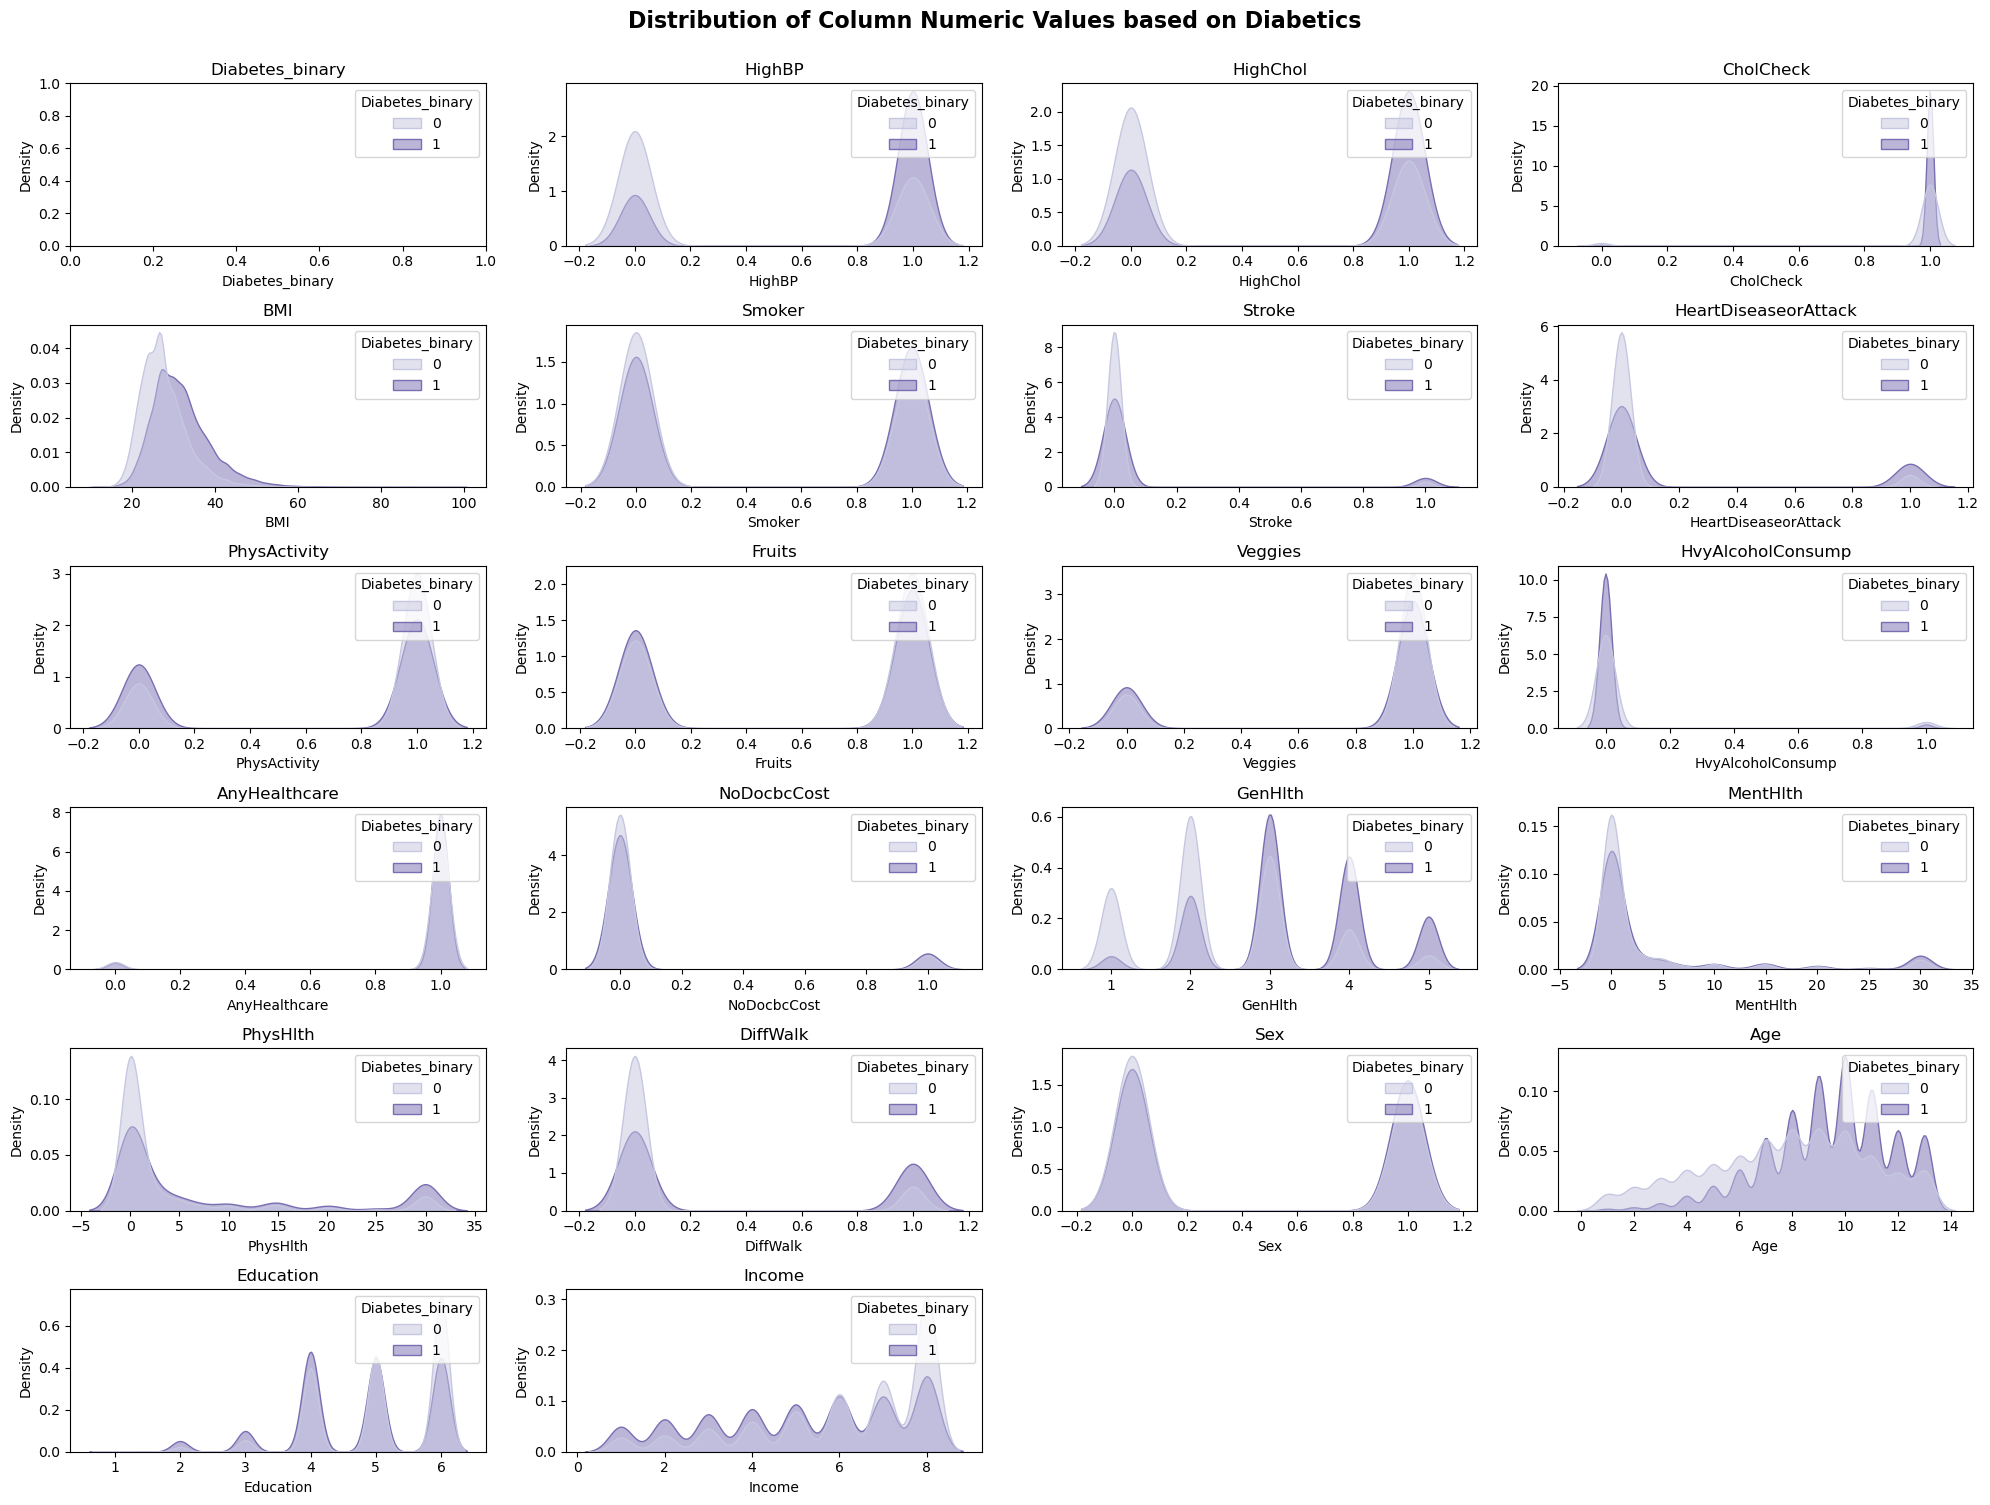

In [55]:
num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data=data1, x=column, hue="Diabetes_binary", 
                fill=True, alpha=.5, palette="Purples", 
                ax=axes[row, col]) \
                .set_title(column)
    
for i in range(len(numerical_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

fig.suptitle('Distribution of Column Numeric Values based on Diabetics', y=1.0, fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

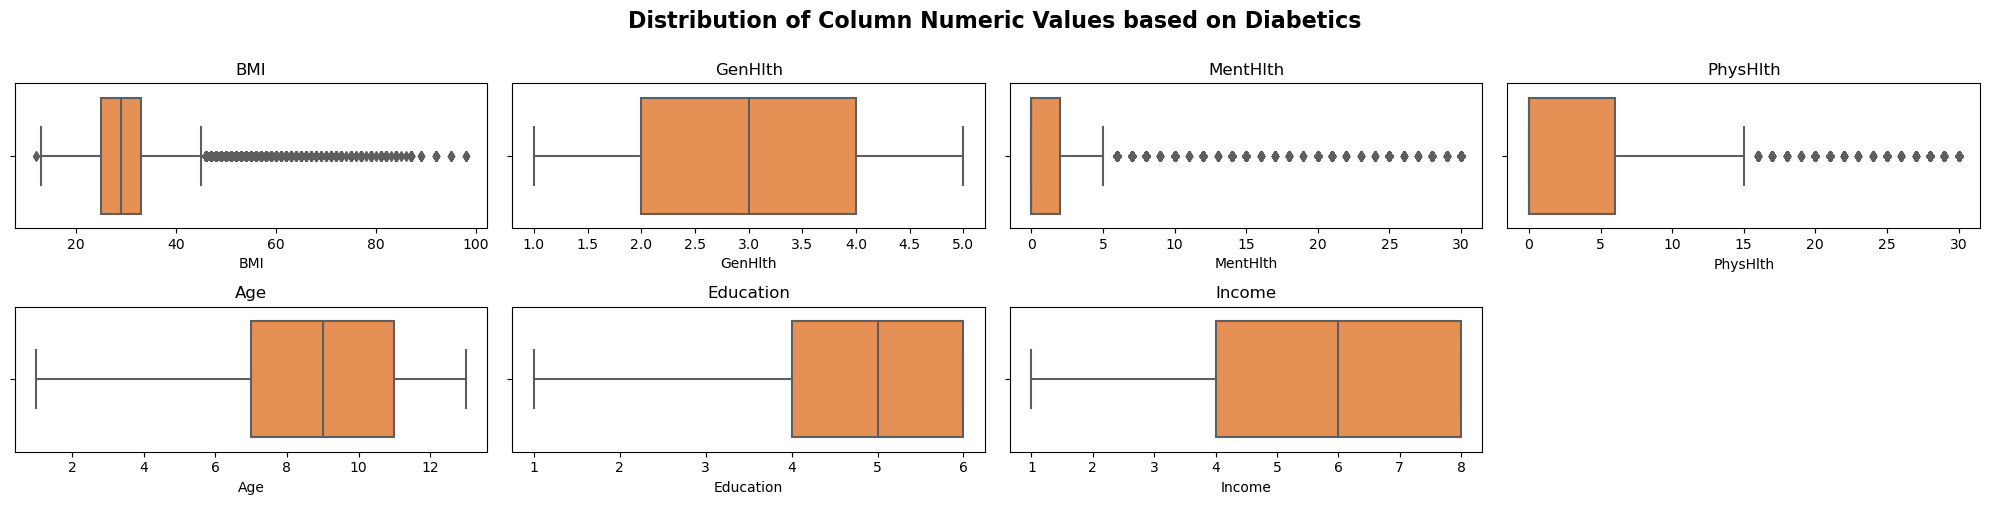

In [112]:
num_cols = 4
num_rows = math.ceil(len(non_biner_columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))
for i, column in enumerate(non_biner_columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=data1[column], ax=axes[row, col], palette="Oranges").set_title(column)
    
for i in range(len(non_biner_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

fig.suptitle('Distribution of Column Numeric Values based on Diabetics', y=1.0, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

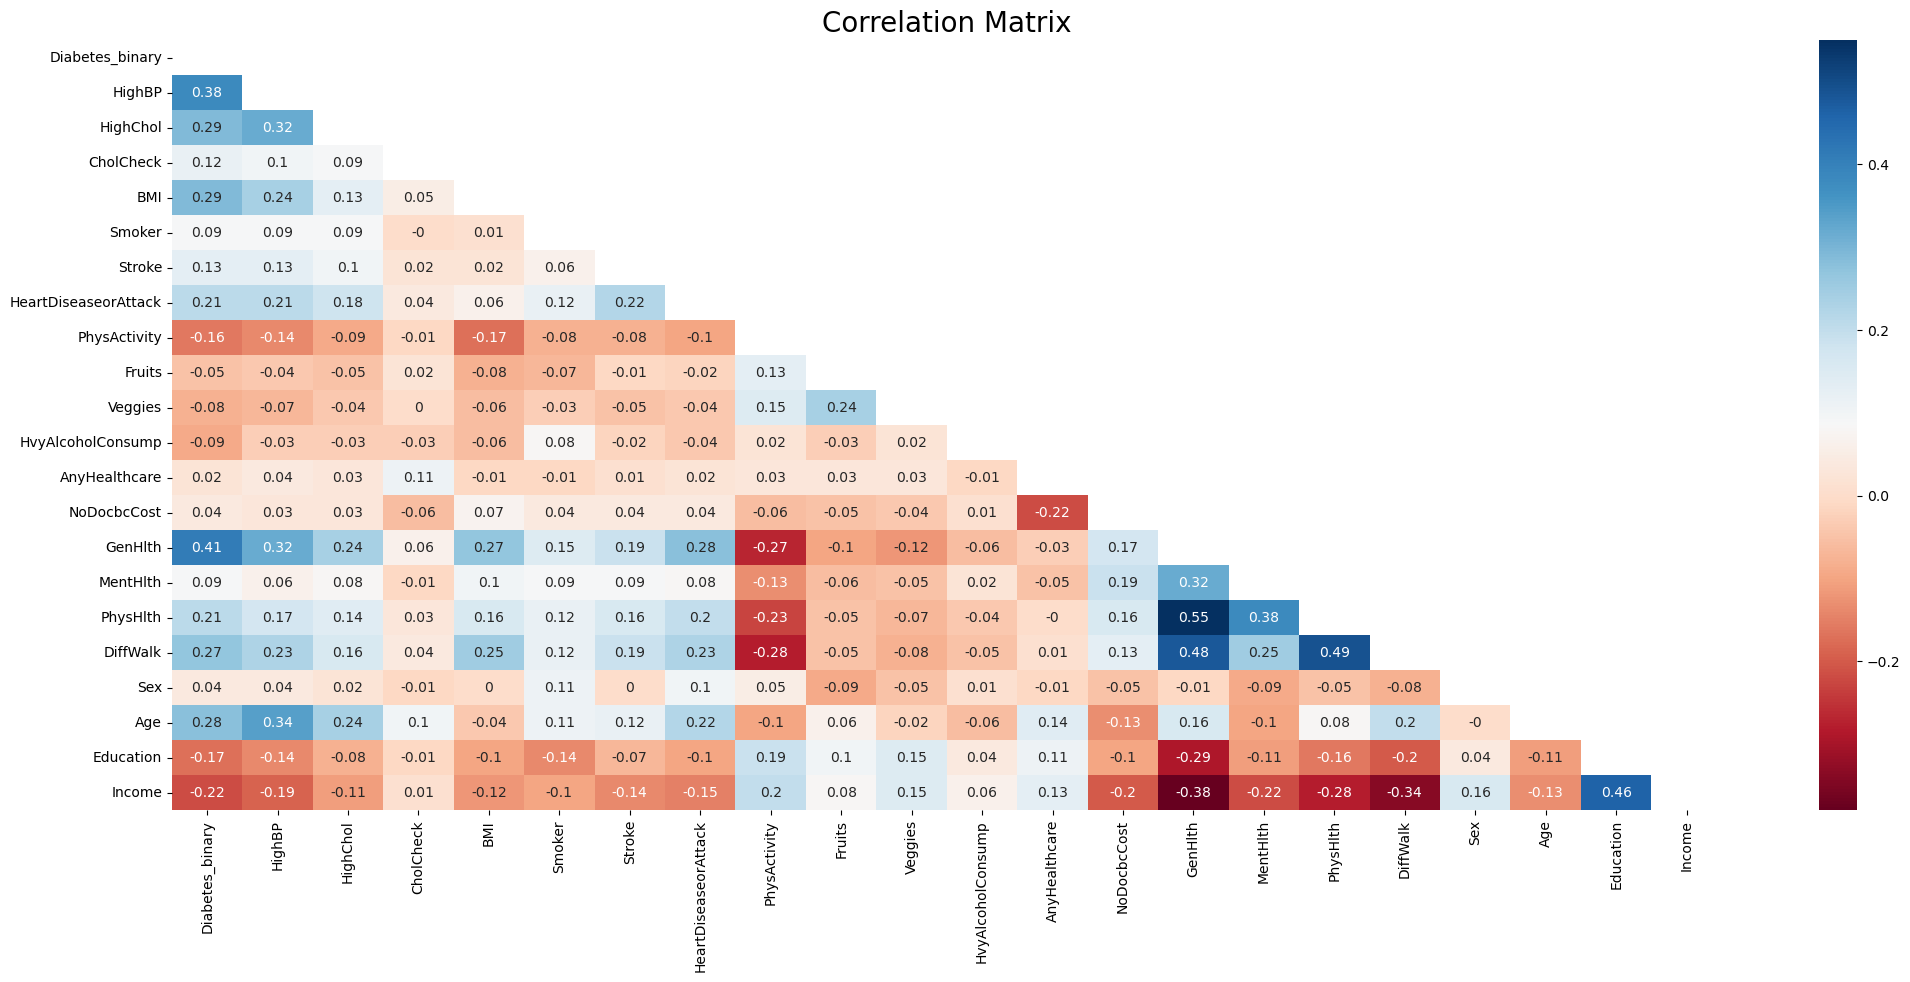

In [113]:
corr_data1 = data1.corr().round(2)

mask = np.zeros_like(corr_data1)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
plt.figure(figsize=(25, 10))
sns.heatmap(corr_data1, annot=True, mask=mask, cmap='RdBu')
plt.title("Correlation Matrix", size=20)

# Feature Selection

### Feature Selection Algorithms

In [5]:
### Pearson Correlation
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    print(str(len(cor_feature)), 'selected features')
    print(cor_feature)
    return cor_feature

### Chi-Squared
def chi_squared_elimination(X, Y,num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, Y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:,chi_support].columns.tolist()
    print(str(len(chi_feature)), 'selected features')
    print(chi_feature)
    return chi_feature

### Recursive Feature Elimination
def recursive_elimination(X, Y,num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
    rfe_selector.fit(X_norm, Y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    print(str(len(rfe_feature)), 'selected features')
    print(rfe_feature)
    return rfe_feature

### Lasso: SelectFromModel
def lasso_elimination(X, Y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
    embeded_lr_selector.fit(X_norm, Y)
    embeded_lr_support = embeded_lr_selector.get_support()
    embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
    print(str(len(embeded_lr_feature)), 'selected features')
    print(embeded_lr_feature)
    return embeded_lr_feature

### LightGBM: SelectFromModel
def LGBMC_elimination(X, Y, num_feats):
    lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
                reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

    embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
    embeded_lgb_selector.fit(X, Y)
    embeded_lgb_support = embeded_lgb_selector.get_support()
    embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
    print(str(len(embeded_lgb_feature)), 'selected features')
    print(embeded_lgb_feature)
    return embeded_lgb_feature

### Tree-based: SelectFromModel
def RFC_elimination (X, Y, num_feats):
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
    embeded_rf_selector.fit(X, Y)

    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
    print(str(len(embeded_rf_feature)), 'selected features')
    print(embeded_rf_feature)
    return embeded_rf_feature

In [6]:
X = data1.drop(columns='Diabetes_binary')
Y = data1['Diabetes_binary']

num_feats = 15

selected_feature = cor_selector(X, Y,num_feats)
# selected_feature = chi_squared_elimination(X, Y,num_feats)
# selected_feature = recursive_elimination(X, Y,num_feats)
# selected_feature = lasso_elimination(X, Y, num_feats)
# selected_feature = LGBMC_elimination(X, Y, num_feats)
# selected_feature = RFC_elimination(X, Y, num_feats)

X = data1[selected_feature]
Y = data1['Diabetes_binary']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print(f'Total # of sample in whole dataset : {len(X)}')
print(f'Total # of sample in train dataset : {len(X_train)}')
print(f'Total # of sample in test dataset  : {len(X_test)}')

15 selected features
['MentHlth', 'HvyAlcoholConsump', 'CholCheck', 'Stroke', 'PhysActivity', 'Education', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'DiffWalk', 'Age', 'HighChol', 'BMI', 'HighBP', 'GenHlth']
Total # of sample in whole dataset : 70692
Total # of sample in train dataset : 49484
Total # of sample in test dataset  : 21208


### No Feature Selection

In [60]:
X = data1.drop(columns='Diabetes_binary')
Y = data1['Diabetes_binary']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 70692
Total # of sample in train dataset: 49484
Total # of sample in test dataset: 21208


# Model

In [7]:
def DNN_Model():
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
    dnn_model.add(Dense(32, activation='relu'))
    dnn_model.add(Dense(1, activation='sigmoid'))
    dnn_model._name = 'DNN_Model'
    return dnn_model

def CNN_Model():
    cnn_model = Sequential()
    cnn_model.add(Conv1D(256, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Conv1D(64, 3, activation='relu'))
    cnn_model.add(MaxPooling1D(pool_size=2))
    # cnn_model.add(Conv1D(32, 3, activation='relu'))
    # cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(1, activation='sigmoid'))
    cnn_model._name = 'CNN_Model'
    return cnn_model

def LSTM_Model():
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))
    lstm_model.add(Dense(units=1))
    lstm_model._name = 'LSTM_Model'
    return lstm_model

def GRU_Model():
    gru_model = Sequential()
    gru_model.add(GRU(units=32, input_shape=(X_train.shape[1], 1)))
    gru_model.add(Dense(units=1))
    gru_model._name = 'GRU_Model'
    return gru_model

def Autoencoder_Model():
    # define the input shape and input layer
    input_shape = (X_train.shape[1],)
    input_layer = Input(shape=input_shape)
    encoded_layer = Dense(256, activation='relu')(input_layer)
    encoded_layer = Dense(64, activation='relu')(encoded_layer)
    decoded_layer = Dense(16, activation='relu')(encoded_layer)
    decoded_layer = Dense(input_shape[0], activation='sigmoid')(decoded_layer)

    # define the Autoencoder model
    autoencoder_model = Model(input_layer, decoded_layer)
    autoencoder_model._name = 'Autoencoder_Model'

    # compile the Autoencoder model and fit the Autoencoder model to the data
    # autoencoder_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
    autoencoder_model.compile(optimizer='adam', loss='mse')
    autoencoder_model.fit(X_train, X_train, epochs=10, batch_size=16, validation_data=(X_test, X_test), verbose=1)
    return autoencoder_model

def NN_Algorithms():
    nn_algorithms = [
        # ('DNN', DNN_Model()),
        # ('CNN', CNN_Model()),
        # ('LSTM', LSTM_Model()),
        # ('GRU', GRU_Model()),
        ('Autoencoder', Autoencoder_Model())
    ]
    return nn_algorithms
    
def compile_train_model(model, X_train, y_train, X_test, y_test):
    # model.summary()
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)
    return model 

def evaluate_model(model, X_test, y_test):
    acc = 'null'
    y_pred  = model.predict(X_test)

    if(model._name == 'Autoencoder_Model'):
        r2  = round(r2_score(X_test, y_pred), 4)
        mse = round(mean_squared_error(X_test, y_pred), 4)
    else:
        r2  = round(r2_score(y_test, y_pred), 4)
        mse = round(mean_squared_error(y_test, y_pred), 4)
    return acc, mse, r2

def NN_result(result, name, acc, r2, mse):
    result.append((name, acc, r2, mse))
    return result

# Training Model

In [8]:
%%time
result = []

algorithms = NN_Algorithms()

for index, model in enumerate(algorithms):
    print(model[0])
    if(model[0] == 'Autoencoder'):
        nn_model = model[1]
    else:    
        nn_model = compile_train_model(model[1], X_train, y_train, X_test, y_test)
        
    acc, mse, r2= evaluate_model(nn_model, X_test, y_test)
    result = NN_result(result, model[0], acc, r2, mse)
    print('=' * 100)
    
nn_results_df = pd.DataFrame(result, columns=('Model Name', 'Accuracy', 'R-Square', 'MSE'))
nn_results_df

Epoch 1/10
3093/3093 [==============================] - 11s 3ms/step - loss: 0.0080 - val_loss: 0.0010
Epoch 2/10
3093/3093 [==============================] - 9s 3ms/step - loss: 8.1508e-04 - val_loss: 7.0559e-04
Epoch 3/10
3093/3093 [==============================] - 9s 3ms/step - loss: 5.5892e-04 - val_loss: 4.2832e-04
Epoch 4/10
3093/3093 [==============================] - 9s 3ms/step - loss: 4.0313e-04 - val_loss: 3.0635e-04
Epoch 5/10
3093/3093 [==============================] - 10s 3ms/step - loss: 2.9971e-04 - val_loss: 2.3630e-04
Epoch 6/10
3093/3093 [==============================] - 10s 3ms/step - loss: 2.3669e-04 - val_loss: 2.1308e-04
Epoch 7/10
3093/3093 [==============================] - 10s 3ms/step - loss: 2.1084e-04 - val_loss: 9.8790e-05
Epoch 8/10
3093/3093 [==============================] - 10s 3ms/step - loss: 8.5022e-05 - val_loss: 7.8206e-05
Epoch 9/10
3093/3093 [==============================] - 9s 3ms/step - loss: 7.0200e-05 - val_loss: 9.1262e-05
Epoch 10/10
3

,Model Name,Accuracy,R-Square,MSE
0,Autoencoder,null,0.9969,0.0001
